<a href="https://colab.research.google.com/github/Rachit304/Machine-Leaning/blob/main/ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mc = pd.read_csv('Movie_classification.csv',header = 0)
mc.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
mc.dtypes

Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
3D_available            object
Time_taken             float64
Twitter_hastags        float64
Genre                   object
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
Start_Tech_Oscar         int64
dtype: object

In [ ]:
df = mc[['Marketing expense','Production expense','Budget','Start_Tech_Oscar','Collection']]
df.head()

,Marketing expense,Production expense,Budget,Start_Tech_Oscar,Collection
0,20.1264,59.62,36524.125,1,48000
1,20.5462,69.14,35668.655,0,43200
2,20.5458,69.14,39912.675,1,69400
3,20.6474,59.36,38873.890,1,66800
4,21.3810,59.36,39701.585,1,72400


In [ ]:
df.isnull().sum()

Marketing expense     0
Production expense    0
Budget                0
Start_Tech_Oscar      0
Collection            0
dtype: int64

In [ ]:
target = df.Start_Tech_Oscar
inputs = df.drop('Start_Tech_Oscar',axis='columns')

In [ ]:
inputs.dtypes

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.5686274509803921

In [ ]:
X_test[:10]

,Marketing expense,Production expense,Budget,Collection
66,20.8758,61.74,32146.785,38800
489,23.6674,110.48,30074.770,14000
85,21.1470,63.98,36829.650,53200
163,50.3804,94.16,46523.125,100000
398,787.0360,91.20,30291.415,10000
427,773.2380,91.20,34452.110,21800
316,26.3654,74.80,32852.270,35600
392,251.5580,91.20,27974.980,19400
2,20.5458,69.14,39912.675,69400
280,20.7156,61.66,43440.100,90800


In [ ]:
y_test[:10]

66     1
489    0
85     0
163    1
398    1
427    0
316    1
392    1
2      1
280    1
Name: Start_Tech_Oscar, dtype: int64

In [ ]:
predict = model.predict(X_test[:10])
predict

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
probab = model.predict_proba(X_test[:10])
probab

array([[5.73522133e-01, 4.26477867e-01],
       [2.61475282e-01, 7.38524718e-01],
       [5.40607879e-01, 4.59392121e-01],
       [1.36539236e-04, 9.99863461e-01],
       [5.11559059e-01, 4.88440941e-01],
       [8.10058853e-01, 1.89941147e-01],
       [5.97139357e-01, 4.02860643e-01],
       [1.83798312e-01, 8.16201688e-01],
       [1.77911112e-01, 8.22088888e-01],
       [4.05623634e-03, 9.95943764e-01]])

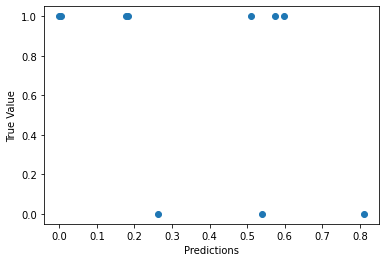

In [ ]:
plt.scatter(probab[:,0],y_test[:10])
plt.xlabel("Predictions")
plt.ylabel("True Value")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn =KNeighborsClassifier(n_neighbors  =  3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test,y_test)

0.5196078431372549